In [ ]:
ls

In [ ]:
!pip install keras


In [13]:
# coding:utf-8
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import os
from PIL import Image
import glob
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator

csvdata_dir = "/home/stsubokura/FoodRecognition/data/"

folder = ["cucumberinside_csv","cucumberoutside_csv","eggplant_csv","gumi_csv", "kamaboko_csv", "konnyaku_csv", "marshmallow_csv"]

max_dataarraysize = 4423 

csvs = []
label = []
buffer = 10

for index, name in enumerate(folder):
    dir = csvdata_dir + name
    files = glob.glob(dir + "/*.csv")
    for i, file in enumerate(files):
        csv = pd.read_csv(file, sep = '\t', encoding = "shift-jis", error_bad_lines = False, header = None,skiprows=[0])
        
        data_delbefore = np.array(csv, dtype = np.float32).T
        data_deleted = np.delete(data_delbefore, 0, axis = 0) #delete meaningless law
        data_array = data_deleted - data_deleted.mean(axis=0)

        data_array_zero = np.zeros((max_dataarraysize, 2))
        
        for i in range(0, int(max_dataarraysize - data_array.shape[1]), buffer):
            data_array_zero = np.zeros((max_dataarraysize, 2))
            data_array_zero[:data_array.shape[1], :] = data_array.T
            csvs.append(data_array_zero)
            label.append(index)

csvs = np.asarray(csvs)

csvs = csvs.astype('float32')
#dataarrays = dataarrays

label = np.asarray(label)
label =  tf.keras.utils.to_categorical(label, 7)

csvs_train, csvs_test, label_train, label_test = train_test_split(csvs, label, test_size=0.1, random_state=111)

print(csvs_train.shape)
print(csvs_train.shape[1:])
print(type(csvs))


(52971, 4423, 2)
(4423, 2)
<class 'numpy.ndarray'>


(10664, 2, 4423)
(10664, 2, 4423)


In [14]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, BatchNormalization

dataarray_width = 4423 
dataarray_high =  2
epochs = 100

# generate train and test data automatically, using scikit-learn
# how diside random state size???

with tf.distribute.MirroredStrategy().scope():
    # CNNを構築
    model = Sequential()
    model.add(Conv1D(32, 7, strides= 3,activation='relu', input_shape = (dataarray_width, dataarray_high) ) )
    model.add(MaxPool1D(3))
    model.add(Conv1D(32, 5, strides= 3,activation='relu'))
    model.add(MaxPool1D(3))
    model.add(Conv1D(32, 5, strides= 3,activation='relu'))
    model.add(Conv1D(32, 5,strides= 3, activation='relu'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(7, activation='softmax', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001) ))

    model.summary()

# コンパイル
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(csvs_train, label_train, batch_size=256, epochs=epochs, validation_data=(csvs_test, label_test))



INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 1473, 32)          480       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 491, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 163, 32)           5152      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 54, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 17, 32)            5152      
_______

207/207 [==============================] - 4s 17ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 45/100
207/207 [==============================] - 4s 17ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 46/100
207/207 [==============================] - 4s 17ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 47/100
207/207 [==============================] - 4s 17ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.9823 - val_loss: 0.0174
Epoch 48/100
207/207 [==============================] - 4s 17ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 49/100
207/207 [==============================] - 4s 17ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 50/100
207/207 [==============================] - 4s 17ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.005

207/207 [==============================] - 3s 17ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0034


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

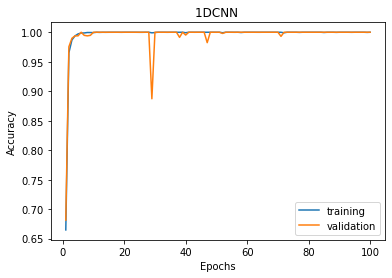

In [16]:
print(history)
plt.title('1DCNN ' )
plt.plot(range(1, epochs+1),  history.history['accuracy'], label="training")
plt.plot(range(1, epochs+ 1), history.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

